In [41]:
import pandas as pd
import pyarrow

file_path_matthias = '../../Samsung_USB/'
file_path_irem = ''
file_path_silas = ''
file_path_rosa = ''
file_path_koen = ''

filenames = [
    'bag_ids_no_funda',
    'random_online_sample',
    'special_house_types_class_sample',
    'detailed_woning_type_sample',
    'not_online_listings', # Download from slack
]

file_path = file_path_matthias # Interchangable

df = pd.read_csv(file_path + "bag_image_summary.csv")
df_sample = pd.read_parquet(file_path + "detailed_woning_type_sample.parquet")
df = pd.read_csv(file_path + "bag_image_summary.csv", dtype="string")
df_joined = pd.merge(df_sample, df, how="left", right_on="bag_id", left_on="bag_nummeraanduidingid")
df_sample_with_urls = df_joined[df_joined["frontview_exists"].notna()]

print(df_sample_with_urls.columns)

Index(['bag_nummeraanduidingid', 'source_data_result_id', 'special_house_type',
       'woningtype', 'straatnaam', 'postcode', 'huisnr', 'huisnr_bag_letter',
       'huisnr_bag_toevoeging', 'plaatsnaam', 'opp_pand', 'oppervlakte',
       'build_year', 'build_type', 'is_monument', 'is_protected',
       'source_data_timestamp', 'geometry', 'random_rank', 'bag_id',
       'num_funda_images', 'frontview_exists', 'frontview_funda_url',
       'frontview_google_url', 'frontview_funda_in_business_url'],
      dtype='object')


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric interpretation: count unique values and their frequencies
special_house_type_counts = df_sample_with_urls['special_house_type'].value_counts(dropna=False)
woningtype_counts = df_sample_with_urls['woningtype'].value_counts(dropna=False)
build_type_counts = df_sample_with_urls['build_type'].value_counts(dropna=False)

In [43]:
print("Special House Type Counts:\n", special_house_type_counts)

Special House Type Counts:
 special_house_type
None                                                         3194
Eengezinswoning, 2-onder-1-kapwoning                          470
Eengezinswoning, tussenwoning                                 468
Eengezinswoning, hoekwoning                                   467
Eengezinswoning, geschakelde 2-onder-1-kapwoning              459
                                                             ... 
Herenhuis, vrijstaande woning (dijkwoning)                      1
Herenhuis, vrijstaande woning (bedrijfs- of dienstwoning)       1
Woonboerderij, vrijstaande woning (dijkwoning)                  1
Herenhuis, vrijstaande woning (split-level woning)              1
Villa, vrijstaande woning (split-level woning)                  1
Name: count, Length: 100, dtype: int64


In [44]:
print("Woningtype Counts:\n", woningtype_counts)

Woningtype Counts:
 woningtype
2-onder-1-kapwoning                500
Benedenwoning                      500
Bovenwoning                        500
Eindwoning                         500
Galerijflat                        500
Geschakelde 2-onder-1-kapwoning    500
Geschakelde woning                 500
Portiekflat                        500
Halfvrijstaande woning             500
Hoekwoning                         500
Maisonnette                        500
Tussenwoning                       500
Portiekwoning                      500
Vrijstaande woning                 500
Corridorflat                       194
Name: count, dtype: int64


In [45]:
print("Build Type Counts:\n", build_type_counts)

Build Type Counts:
 build_type
Appartement                     3211
Tussen of geschakelde woning    1528
Hoekwoning                      1228
Tweeonder1kap                    742
Vrijstaande woning               484
Verschillend                       1
Name: count, dtype: int64


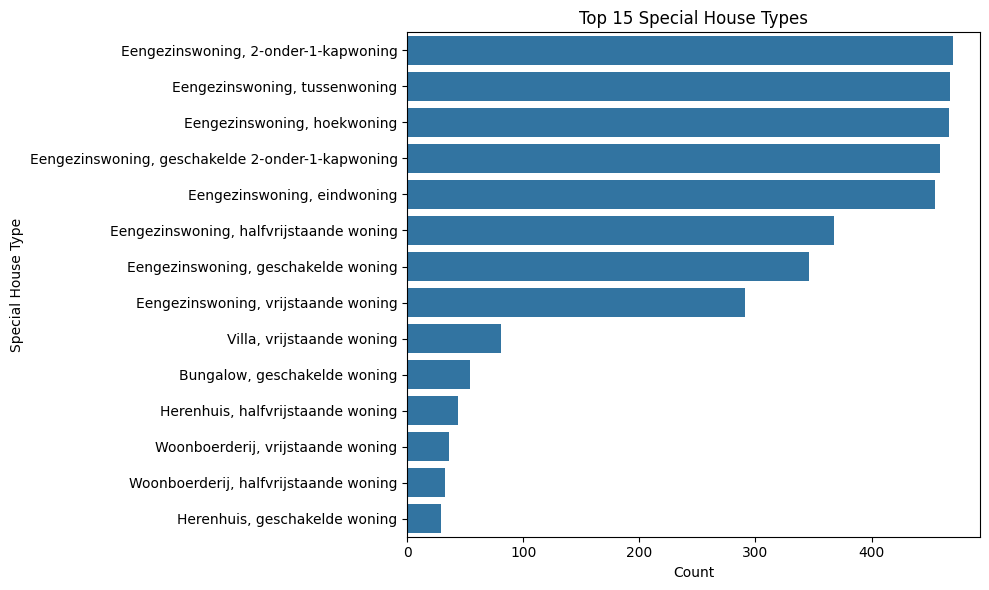

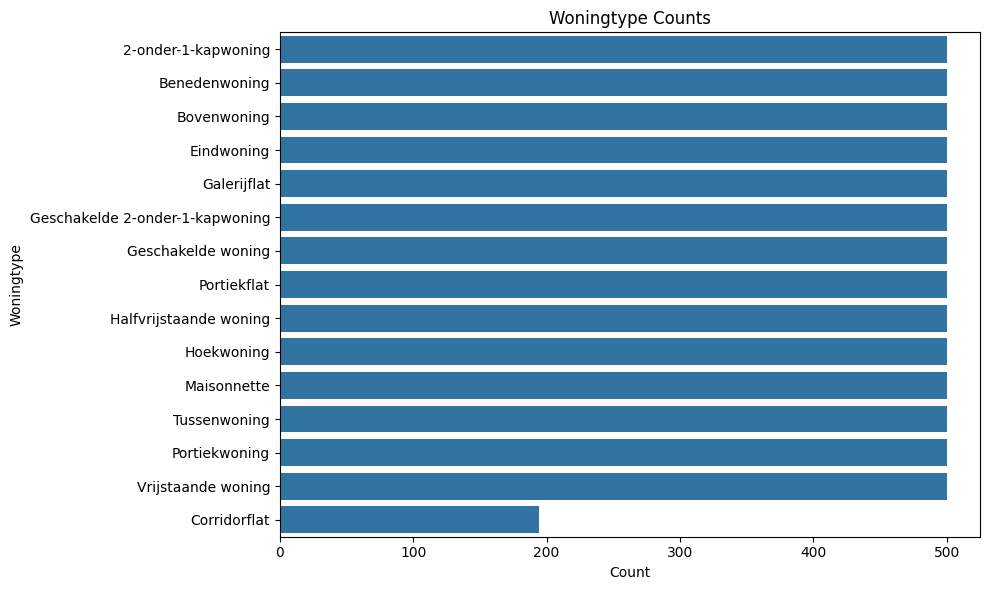

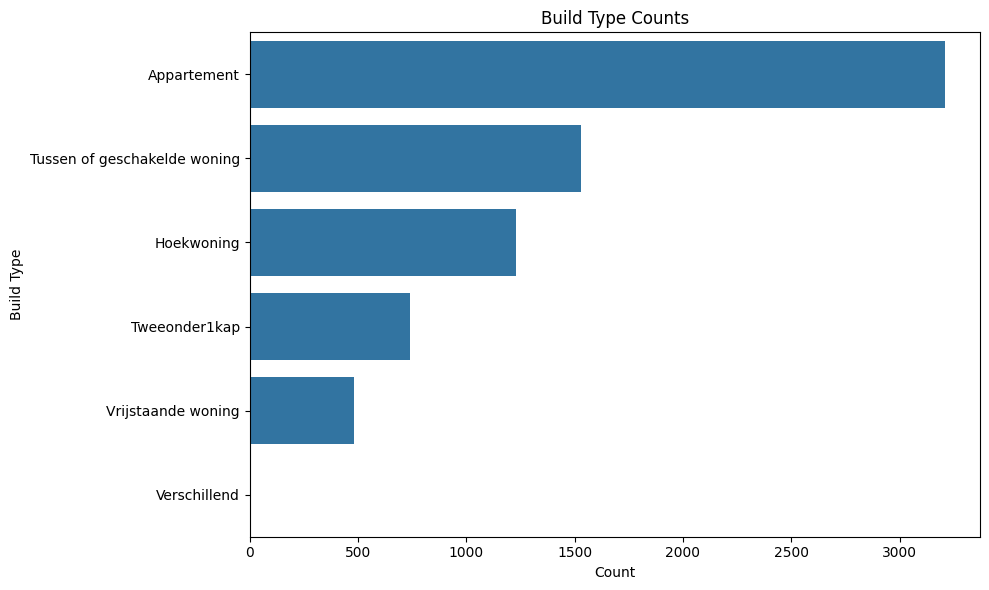

In [46]:
# Bar chart for special_house_type
plt.figure(figsize=(10, 6))
sns.barplot(
    y=special_house_type_counts.index[:15],  # show top 15 for readability
    x=special_house_type_counts.values[:15],
)
plt.title("Top 15 Special House Types")
plt.xlabel("Count")
plt.ylabel("Special House Type")
plt.tight_layout()
plt.show()

# Bar chart for woningtype
plt.figure(figsize=(10, 6))
sns.barplot(
    y=woningtype_counts.index,
    x=woningtype_counts.values,
)
plt.title("Woningtype Counts")
plt.xlabel("Count")
plt.ylabel("Woningtype")
plt.tight_layout()
plt.show()

# Bar chart for build_type
plt.figure(figsize=(10, 6))
sns.barplot(
    y=build_type_counts.index,
    x=build_type_counts.values,
)
plt.title("Build Type Counts")
plt.xlabel("Count")
plt.ylabel("Build Type")
plt.tight_layout()
plt.show()

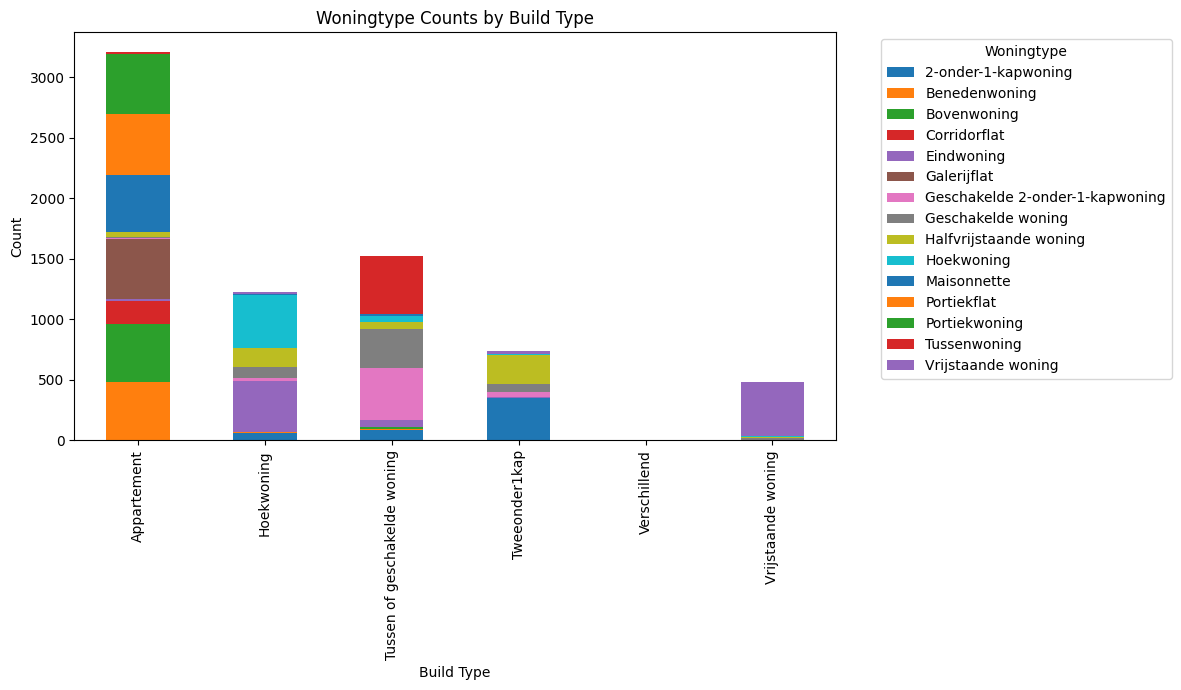

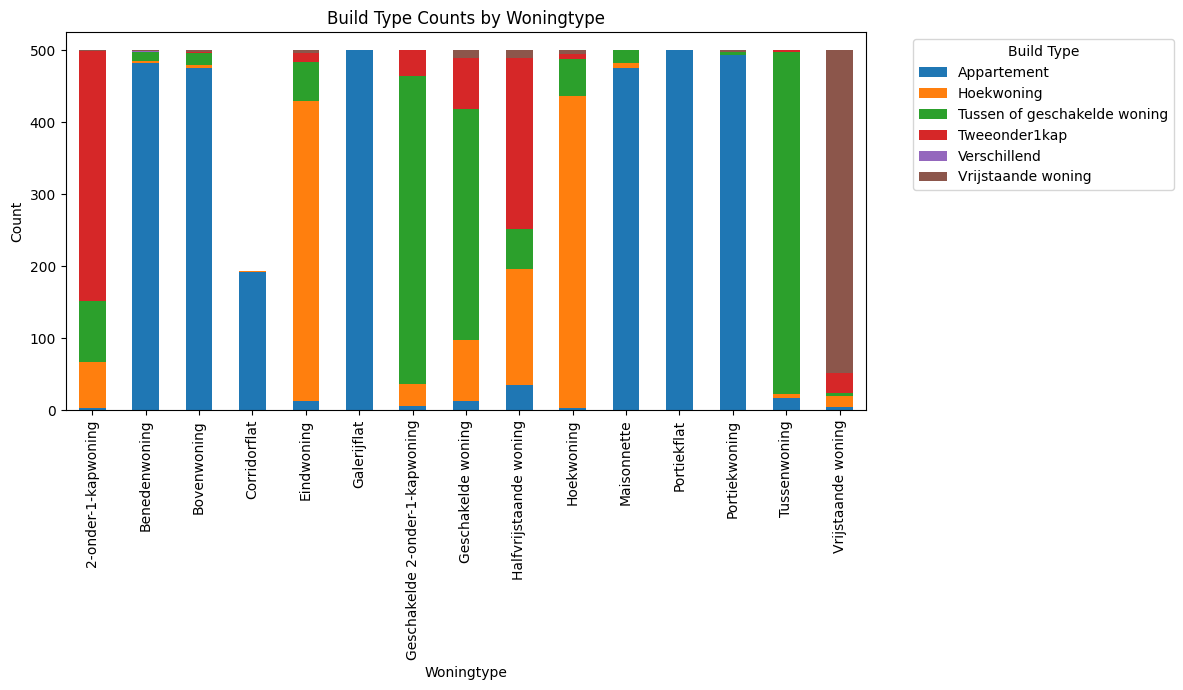

In [47]:
build_woning_counts = df_sample_with_urls.groupby(['build_type', 'woningtype']).size().unstack(fill_value=0)
woning_build_counts = df_sample_with_urls.groupby(['woningtype', 'build_type']).size().unstack(fill_value=0)

# Plot stacked bar chart
build_woning_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Woningtype Counts by Build Type")
plt.xlabel("Build Type")
plt.ylabel("Count")
plt.legend(title="Woningtype", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot stacked bar chart (woningtype as index)
woning_build_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Build Type Counts by Woningtype")
plt.xlabel("Woningtype")
plt.ylabel("Count")
plt.legend(title="Build Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
# Numeric representation
print("build_type subdivided into woningtype (build_type x woningtype):\n", build_woning_counts)

build_type subdivided into woningtype (build_type x woningtype):
 woningtype                    2-onder-1-kapwoning  Benedenwoning  Bovenwoning  \
build_type                                                                      
Appartement                                     3            483          475   
Hoekwoning                                     64              2            4   
Tussen of geschakelde woning                   85             12           17   
Tweeonder1kap                                 347              1            2   
Verschillend                                    0              1            0   
Vrijstaande woning                              1              1            2   

woningtype                    Corridorflat  Eindwoning  Galerijflat  \
build_type                                                            
Appartement                            192          13          500   
Hoekwoning                               1         417            0   
T

In [49]:
print("woningtype subdivided into buildtype (woningtype x build_type):\n", woning_build_counts)

woningtype subdivided into buildtype (woningtype x build_type):
 build_type                       Appartement  Hoekwoning  \
woningtype                                                 
2-onder-1-kapwoning                        3          64   
Benedenwoning                            483           2   
Bovenwoning                              475           4   
Corridorflat                             192           1   
Eindwoning                                13         417   
Galerijflat                              500           0   
Geschakelde 2-onder-1-kapwoning            5          31   
Geschakelde woning                        13          85   
Halfvrijstaande woning                    35         161   
Hoekwoning                                 3         434   
Maisonnette                              475           7   
Portiekflat                              500           0   
Portiekwoning                            493           1   
Tussenwoning                       